In [12]:
# ****************** GENERAL IMPORTS **************************
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import scipy.ndimage as ndi
# *************************************************************

In [3]:
from models.zf_unet_224 import ZF_UNET_224

Using TensorFlow backend.


In [5]:
filenames = glob.glob(os.path.join('../data/test_224', '*'))
selection = filenames[:10]

In [4]:
# Load model weights
model = ZF_UNET_224()
model.load_weights('./weights_224_100epochs/temp.99--1.94.hdf5')

In [8]:
# Read images from selection
imgs = []
for fname in selection:
    imgs.append(io.imread(fname))
imgs = np.asarray(imgs)

In [12]:
# Run prediction on a batch
masks = model.predict_on_batch(imgs)
print(masks.shape)

# Binarize the predictions
masks_bin = np.squeeze(masks) > 0.5

# Visualize the results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 30))
for idx, img in enumerate(imgs[:4]):
    axes[idx].imshow(img)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 30))
for idx, mask in enumerate(masks_bin[:4]):
    axes[idx].imshow(mask)
plt.show()

(10, 224, 224, 1)


(224, 224)


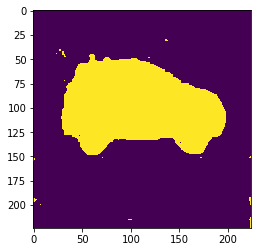

uint8
0


In [82]:
# Visualize downscaled predictions
img = cv2.imread('../data/predicts_224/13987558f6b2_13.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow((img >= 1).astype(np.uint8))
plt.show()
print(img.dtype)
print(np.min(img))

[[False False  True False False]
 [False  True  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [False False  True False False]]


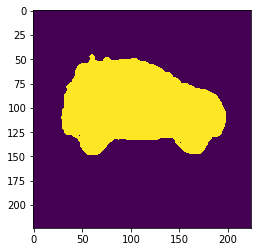

In [83]:
# Improve the prediction via morphology
struct = ndi.morphology.generate_binary_structure(2, 1)
struct = ndi.morphology.iterate_structure(struct, 2)
print(struct)

img_bin = img >= 1
img_fixed = ndi.morphology.binary_opening(img_bin, struct)
plt.imshow(img_fixed)
plt.show()

In [84]:
# Resize the prediction to the full size, and visualize them
mask_up = cv2.resize(img_fixed.astype(np.uint8), (1913, 1280))

plt.imshow(mask_up)
plt.show()
print(np.unique(mask_up))

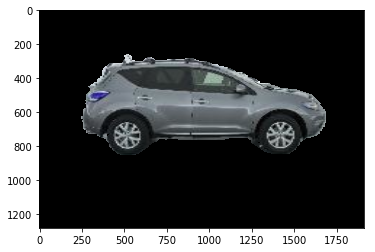

In [87]:
# Apply prediction mask to the test image
img = cv2.imread('../data/test_224/13987558f6b2_13.jpg')
img_up = cv2.resize(img, (1913, 1280))
img_up[np.where(mask_up==0)] = 0
plt.imshow(img_up)
plt.show()

|

|

|

|

|

|

|

|

|

|

|

[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]


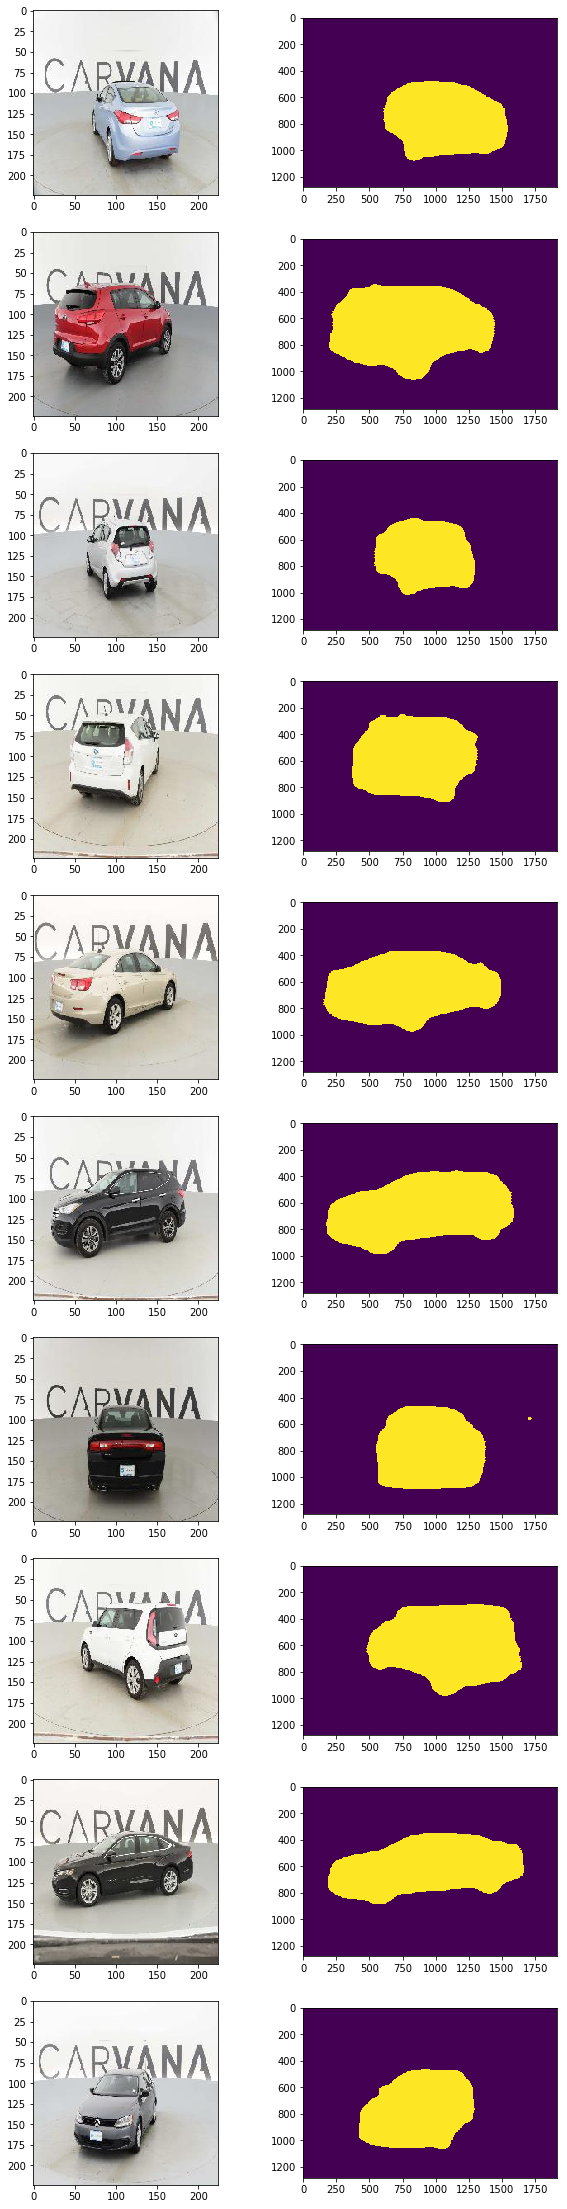

In [10]:
# Visualize test images, and predicted improved resized 4/*.jpg'))
fnames_out_224 = sorted(glob.glob('../data/predicts_224/*.jpg'))

idxs = np.random.randint(0, len(fnames_in_224), 10)
sel_in = [fnames_in_224[i] for i in idxs]
sel_out = [fnames_out_224[i] for i in idxs]

fig, axes = plt.subplots(ncols=2, nrows=len(idxs), figsize=(10, 40))

for idx, (f_i, f_o) in enumerate(zip(sel_in, sel_out)):
    img = cv2.imread(f_i, cv2.IMREAD_COLOR)[:, :, ::-1]
    mask = cv2.imread(f_o, cv2.IMREAD_GRAYSCALE)
    
    axes[idx, 0].imshow(img)
    mask = np.not_equal(mask, 0)
    mask = ndi.filters.median_filter(mask, size=7, mode='constant', cval=False)
    mask = cv2.resize(mask.astype(np.uint8), (1918, 1280))
    mask = np.not_equal(mask, 0)
    axes[idx, 1].imshow(mask)
    
    print(np.unique(mask))
    print(np.min(mask), np.max(mask))

plt.show()

In [21]:
struct = ndi.generate_binary_structure(2, 2)
print(struct)
struct = ndi.iterate_structure(struct, 4)
print(struct)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]


In [22]:
y = ndi.morphology.binary_closing(x, struct)

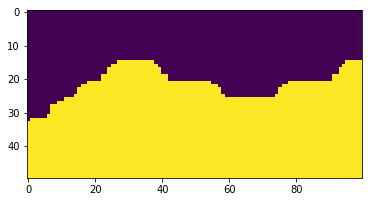

In [24]:
plt.imshow(y[425:475, 550:650])
plt.show()

RLE Debugging
---------------

In [7]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import scipy.ndimage as ndi

from utils import _rle_string_to_mask, _mask_to_rle_string


df_masks = pd.read_csv('../data/train_masks.csv', nrows=10)
print(df_masks)

# Check mask recovery from code on train example
temp_rle = df_masks['rle_mask'][0]
temp_mask = _rle_string_to_mask(temp_rle)
plt.imshow(temp_mask, cmap=plt.cm.gray)
plt.show()

# Check if encoding is correct via roundtrip
temp_rle_recov = _mask_to_rle_string(temp_mask)
temp_mask_recov = _rle_string_to_mask(temp_rle_recov)
temp_mask_recov = _rle_string_to_mask(_mask_to_rle_string(temp_mask_recov))
print(temp_rle[:10])
print(temp_rle_recov[:10])
plt.imshow(temp_mask_recov, cmap=plt.cm.gray)
plt.show()